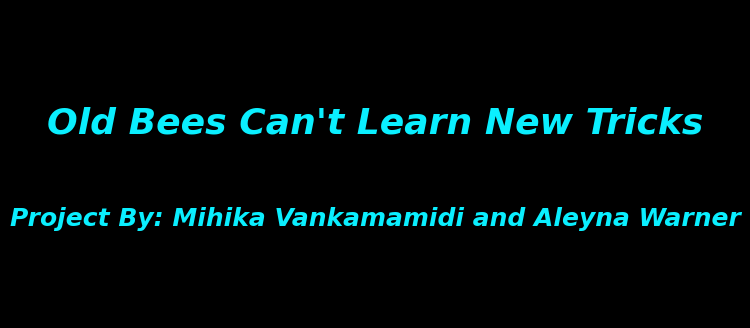

In [ ]:

# Create a figure and axis with a black background
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

# Set the title with specific formatting
title_text = "Project By: Mihika Vankamamidi and Aleyna Warner"
plt.text(0.5, 0.3, title_text, color='#0AEFFF', fontsize=18, ha='center', fontweight='bold', fontstyle='italic')

additional_text = "Old Bees Can't Learn New Tricks"
plt.text(0.5, 0.6, additional_text, color='#0AEFFF', fontsize=26, ha='center', fontweight='bold', fontstyle='italic')

# Remove axes
ax.axis('off')

# Display the banner
plt.show()


In [ ]:
import pandas as pd
import pymc as pm
import arviz as az
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from graphviz import Digraph
data = pd.read_csv("https://raw.githubusercontent.com/daniel-saunders-phil/cogs-303/main/final_project_data/Loukola%20-%20experiment%202.csv")
data

,ID,Colony,Treatment,Trial,Success,Ball type,solving time
0,11,1,1,1,1,1.0,6
1,11,1,1,2,1,1.0,2
2,11,1,1,3,1,1.0,1
3,11,1,1,4,1,1.0,14
4,11,1,1,5,1,2.0,12
...,...,...,...,...,...,...,...
318,88,9,3,7,0,NaN,NaN
319,88,9,3,8,0,NaN,NaN
320,88,9,3,9,0,NaN,NaN
321,88,9,3,10,0,NaN,NaN


The research paper that we choose to analyze was "Bumblebees show cognitive flexibility by improving on an observed complex behavior" by Loukola et al.. In this paper, the researchers set up a task that tested bumblebees in three different scenarios. The bumblebees were required to move a small ball to a specified location on a platform to gain access to a reward (a sugar solution). The task included three different demonstration conditions to examine the influence of social learning on task performance. These three conditions were as follows:  
- Live Demonstration: a live conspecific demonstrated moving the ball from a farther position towards the center.
- Ghost Demonstration: a magnet (not visable to the bees) moved the ball, simulating the action without a visible actor.
- No Demonstration: bees found the ball at the center from the beginning, without any demonstration of movement (kind of just had to get lucky).

The authors obtained some interesting results. The main one that we are interested in for our good case model is condition vs success rate! The results the researchers found for this were as follows:  
- Live Demonstration: the bees showed a very high success rate (99% ± 1%).
- Ghost Demonstration: the bees were moderately successful (78% ± 5.5%), definitely less successful than the live demonstration.
- No Demonstration: the bees were the least successful in this condition (34% ± 7%).  

Overall, they found that the behavior of the demonstrater was vital for the bee's success.  

In [ ]:
# splitting up the data in order to model the three different conditions
demo1 = data[data.Treatment == 1].Success.values
demo2 = data[data.Treatment == 2].Success.values
demo3 = data[data.Treatment == 3].Success.values

demo1,demo2,demo3

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 1,

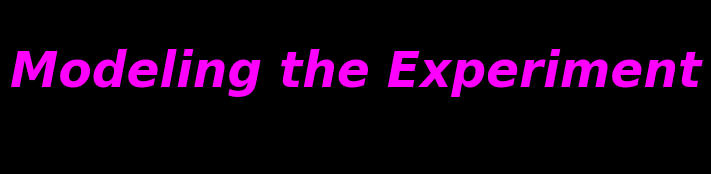

In [ ]:
# Create a figure and axis with a black background
fig, ax = plt.subplots(figsize=(8, 2))
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

# Set the title with specific formatting
title_text = "Modeling the Experiment"
plt.text(0.5, 0.5, title_text, color='magenta', fontsize=35, ha='center', fontweight='bold', fontstyle='italic')

# Remove axes
ax.axis('off')

# Display the banner
plt.show()

In [ ]:
with pm.Model() as model_1:

    p1 = pm.Beta('Live',10,2)
    p2 = pm.Beta('Ghost',5,3)
    p3 = pm.Beta('None',1,2)

    y1 = pm.Binomial('y1',n=1,p=p1,observed=demo1)
    y2 = pm.Binomial('y2',n=1,p=p2,observed=demo2)
    y3 = pm.Binomial('y3',n=1,p=p3,observed=demo3)

    trace_1 = pm.sample()

To model the behavior of the bees in our good case, I opted to use Beta distributions for each group, but separate values to represent the variability throughout the experiment. In this case, the context was pretty clear that the main affecting factor here would be the demonstration showed the bees, which allows me to manipulate my priors a bit to reflect their behavior.

The choice of a Beta distribution is particularly suitable because it is defined on the interval [0, 1], which is ideal for modeling probabilities such as the success rate of bees in completing the task. By using separate parameters for each type of demonstration—live, magnet, and no demonstration—I can incorporate empirical data directly into the model's structure. For instance, the high success rate observed with live demonstrations suggests a prior heavily skewed towards higher probabilities (represented by a Beta distribution with parameters ($\alpha$ = 10, $\beta$ = 2) Conversely, the lower success rates in the ghost and no demonstration conditions warrant priors that reflect these less favorable outcomes (with parameters $\alpha$ = 5 , $\beta$ = 3 and $\alpha$ = 1, and $\beta$ = 2, respectively).

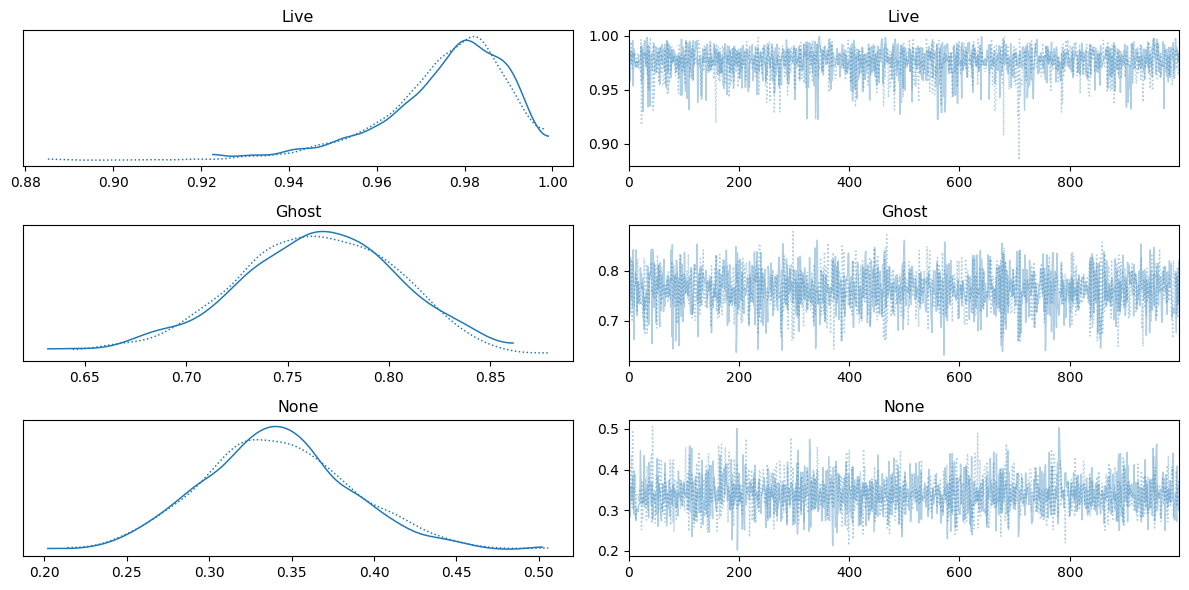

In [ ]:
az.plot_trace(trace_1)
plt.tight_layout();

In [ ]:
az.summary(trace_1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Live,0.975,0.014,0.948,0.997,0.000,0.000,2395.0,1363.0,1.0
Ghost,0.763,0.041,0.690,0.842,0.001,0.001,2850.0,1379.0,1.0
None,0.341,0.045,0.256,0.425,0.001,0.001,2694.0,1629.0,1.0


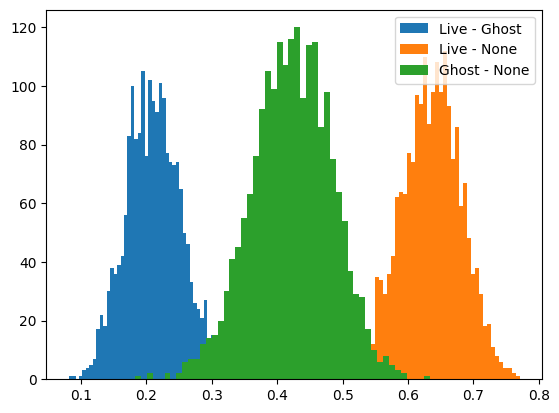

In [ ]:
live_ghost_diff = trace_1.posterior['Live'].values.flatten() - trace_1.posterior['Ghost'].values.flatten()
live_none_diff = trace_1.posterior['Live'].values.flatten() - trace_1.posterior['None'].values.flatten()
ghost_none_diff = trace_1.posterior['Ghost'].values.flatten() - trace_1.posterior['None'].values.flatten()

plt.hist(live_ghost_diff,bins=50, label = "Live - Ghost");
plt.hist(live_none_diff,bins=50, label = "Live - None");
plt.hist(ghost_none_diff,bins=50, label = "Ghost - None");
plt.legend()

The plot above shows the differences between conditions. It shows that there is a big difference between the live demo condition and the no demo condition, as well as a moderate difference between the ghost condition and the no demo condition. It also shows a decently small difference between the live demo condition and the ghost demo condition. All of these results are consistent with those found in the paper. The researchers mention that the behavior of the demonstrator was vital for the success of the bee, but they also mention that bees recieving the ghost demonstration were more successful on average than the bees that go no demonstration, suggesting that observation of a moving ball in any capacity was enough for bees to solve the task. This makes sense, and matches well to our model and the graph above. It is clear, given the moderate to severe differences in demo to no demo categories that the demonstration with a ball in an capacity was enough to help the bees solve the task.

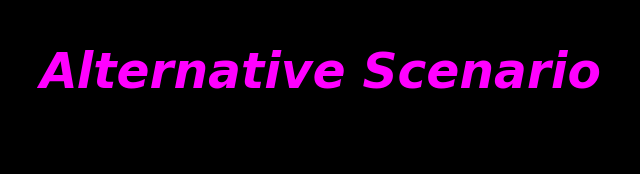

In [ ]:
# Create a figure and axis with a black background
fig, ax = plt.subplots(figsize=(8, 2))
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

# Set the title with specific formatting
title_text = "Alternative Scenario"
plt.text(0.5, 0.5, title_text, color='magenta', fontsize=35, ha='center', fontweight='bold', fontstyle='italic')

# Remove axes
ax.axis('off')

# Display the banner
plt.show()


In the second experiment of the study, we propose that the sequence of the trials—beginning with "Live demonstration," followed by "Ghost" or "Magnet," and concluding with "No demonstration"—introduced a significant age discrepancy among the bee groups. This discrepancy was influenced by the extended duration to complete each set of trials, which was not specified by the researchers. We estimate that each trial phase took about a month, making bees in the "Magnet" and "No demonstration" groups at least one and two months older, respectively, than those in the "Live demonstration" group.

This age difference is critical as it likely contributed to diminished vigor and agility among the older bees, attributes crucial for the task's success. Younger bees in the "Live demonstration" group would have been more agile and responsive to priming, enhancing their task performance. Consequently, the observed differences in performance across the groups, initially attributed to the effectiveness of the demonstration type, may instead be significantly impacted by the bees' ages. This introduces a common cause scenario where the age of the bees not only affects the effectiveness of priming—where younger bees pick up priming better—but also influences the overall success rate, as older bees have a harder time moving in general and exhibit slower response times. Thus, the diminished performance of the older bees, particularly in the "Magnet" and "No demonstration" groups, could offer an alternate explanation that challenges the researchers' initial conclusions.

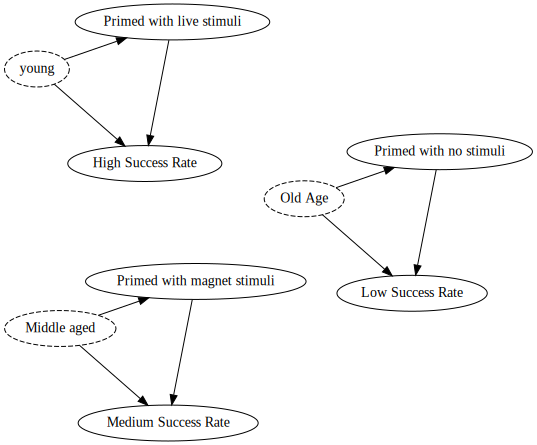

In [ ]:
from graphviz import Digraph

G = Digraph()
G.graph_attr['layout'] = 'neato'

G.node("a",'Primed with no stimuli',pos="200,400")
G.node("b",'Old Age',pos="0,200",style="dashed")
G.node("c","Low Success Rate",pos="100,0")

G.edge("a",'c',len='2.0')
G.edge("b",'a',len='2.0')
G.edge("b",'c',len='2.0')

G.node("d",'Primed with live stimuli',pos="200,400")
G.node("e",'young',pos="0,200",style="dashed")
G.node("f","High Success Rate",pos="100,0")

G.edge("d",'f',len='2.0')
G.edge("e",'d',len='2.0')
G.edge("e",'f',len='2.0')

G.node("g",'Primed with magnet stimuli',pos="200,400")
G.node("h",'Middle aged',pos="0,200",style="dashed")
G.node("i","Medium Success Rate",pos="100,0")

G.edge("g",'i',len='2.0')
G.edge("h",'g',len='2.0')
G.edge("h",'i',len='2.0')

G

The model below demonstrates the relationship shown above, where we have greatly reduced the affect of the priming type and have increased the affect of age on both priming itself and the eventual task completion

In [ ]:

"""DO NOT DELETE AT ALL AT ALL AT ALL THIS IS THE ONE THAT RULED THEM ALL ALEYNA IT IS LITERALLY A MIRACLE"""
def logistic(x):
    """Logistic function for converting task value into a binary success
    outcome."""
    # used chatGPT to help me soften the curve and find the right equation
    probability = 1 / (1 + np.exp(-0.05 * (x - 45)))
    return np.random.binomial(1, probability)

def priming_affect(age, group_type):
    """Priming effect that decreases with age, enhanced for certain groups and
    none for 'none'."""
    if group_type == 2:  # 'None' group has no affect since there is no priming
        return 0
    """Higher effect for 'live', slightly less for magnet"""
    max_effect = 64 if group_type == 0 else 35
    decay_rate = 0.006  # Decay rate
    # used chatGPT to help me figure out the right equation here for decay
    return max_effect * np.exp(-decay_rate * age)

def age_impact(age):
    """the function provides the impact of age, it will be more negeative as the age increases"""
    if age <= 30:
        return 0
    elif age <= 60:
        """old age impact still fairly present for bees in the middle ages"""
        return -0.09 * (age - 30) - 1
    else:
        """old age impact greatest for bees over 60"""
        return -0.1 * (age - 60) - 2



primed = np.random.choice([0, 1, 2], size=1000)  # 0: Live, 1: Magnet, 2: None
completionLive = []
completionMagnet = []
completionNone = []

for i in range(1000):
    """I divided the age values so that it is assumed that it took about
    a month for each type of trial with a little bit of overap"""
    if primed[i] == 0:
        age_val = np.random.uniform(1, 30)
    elif primed[i] == 1:
        age_val = np.random.uniform(25, 60)
    else:
        age_val = np.random.uniform(55, 90)


    base_value = 70  # the same base value for all of them
    priming_effect = priming_affect(age_val, primed[i])
    age_impact_value = age_impact(age_val)
    """this function represents the impact of both priming (influenced by age) and
    age itself since bees will just be weaker in general if they are old"""
    task_value = base_value + 0.95*priming_effect + 11*age_impact_value

    result = logistic(task_value)
    if primed[i] == 0:
        completionLive.append(result)
    elif primed[i] == 1:
        completionMagnet.append(result)
    else:
        completionNone.append(result)

# Calculate mean success rates
live_demo_success_rate = np.mean(completionLive)
magnet_demo_success_rate = np.mean(completionMagnet)
no_demo_success_rate = np.mean(completionNone)

# Print updated success rates
print("Live Demo Success Rate:", live_demo_success_rate)
print("Magnet Demo Success Rate:", magnet_demo_success_rate)
print("No Demo Success Rate:", no_demo_success_rate)


Live Demo Success Rate: 0.9882005899705014
Magnet Demo Success Rate: 0.7739130434782608
No Demo Success Rate: 0.35443037974683544


In order to see how our results do we are going to look at how our means seen above compare:  

- in the Live Demonstration results : the bees showed a very high success rate (99% ± 1%) in the Alternative Results we see that the Average is 98.8% which is well within the error margin.
- Ghost Demonstration: the bees were moderately successful (78% ± 5.5%), in the Alternative Results we see that the Average is 77.3% which is well within the error margin.
- No Demonstration: the bees were the least successful in this condition (34% ± 7%) in the Alternative Results we see that the Average is 35.4% which is well within the error margin.  

All three demonstrate that this model seems to fit very well with the results given in the data.

In [ ]:
with pm.Model() as model_4:

    p1 = pm.Beta('Live',10,2)
    p2 = pm.Beta('Ghost',5,3)
    p3 = pm.Beta('None',1,2)

    y1 = pm.Binomial('y1',n=1,p=p1,observed=completionLive)
    y2 = pm.Binomial('y2',n=1,p=p2,observed=completionMagnet)
    y3 = pm.Binomial('y3',n=1,p=p3,observed=completionNone)

    trace_2 = pm.sample()

In [ ]:
az.summary(trace_2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Live,0.973,0.009,0.956,0.987,0.0,0.0,3073.0,1512.0,1.0
Ghost,0.751,0.024,0.703,0.795,0.0,0.0,3018.0,1345.0,1.0
None,0.343,0.026,0.292,0.389,0.0,0.0,3064.0,1327.0,1.0


The Model Shows No Divergenes and also converges at one which seems to indicate a good fit

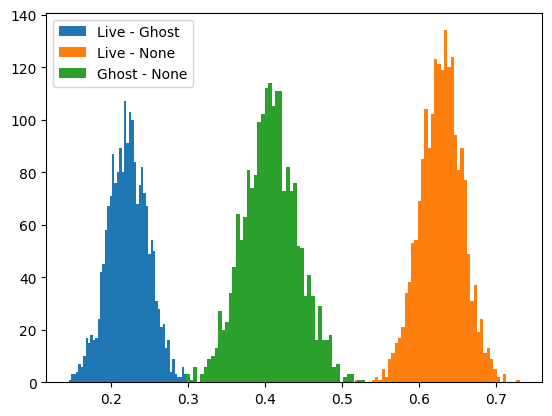

In [ ]:
live_ghost_diff = trace_2.posterior['Live'].values.flatten() - trace_2.posterior['Ghost'].values.flatten()
live_none_diff = trace_2.posterior['Live'].values.flatten() - trace_2.posterior['None'].values.flatten()
ghost_none_diff = trace_2.posterior['Ghost'].values.flatten() - trace_2.posterior['None'].values.flatten()



plt.hist(live_ghost_diff,bins=50, label = "Live - Ghost");
plt.hist(live_none_diff,bins=50, label = "Live - None");
plt.hist(ghost_none_diff,bins=50, label = "Ghost - None");
plt.legend()

The Posterior Graphs Demonstrate a very similar relationship to that seen in the other trace graph in part 1. It shows that there is a big difference between the live demo condition and the no demo condition, as well as a moderate difference between the ghost condition and the no demo condition. If anything the difference is slightly more pronounced here

Overall the model is robust as it demonstrates the same overall patterns with different under lying factors

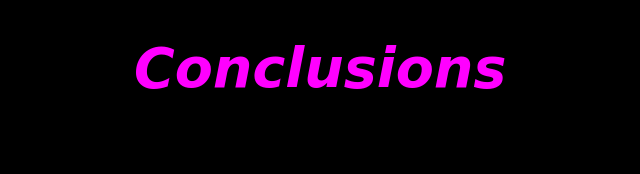

In [ ]:
# Create a figure and axis with a black background
fig, ax = plt.subplots(figsize=(8, 2))
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

# Set the title with specific formatting
title_text = "Conclusions"
plt.text(0.5, 0.5, title_text, color='magenta', fontsize=40, ha='center', fontweight='bold', fontstyle='italic')

# Remove axes
ax.axis('off')

# Display the banner
plt.show()


### Overview of Models

In the **good case model**, we based our assumptions on the original findings from Loukola et al., which suggested that different demonstration strategies (live, magnet, no demonstration) significantly influence the learning success rates of bees. We modeled this using Beta distributions with priors set according to the empirical success rates observed for each demonstration type.

In the **bad case model**, We introduced an alternative explanation that challenges the prevailing assertion regarding the significance of demonstration type in influencing bee performance. Our model proposed that the variable of age, and not just the demonstration type, significantly affects performance outcomes. Specifically, this model posits that younger bees are more capable of grasping priming concepts effectively, enhancing the impact of priming on their performance. Conversely, it suggests that older bees struggle more with the task due to their age. Thus, age serves as a common cause factor, influencing both the receptiveness to priming and the general task performance across different groups
### Analyzing Model Robustness

1. **Model Fit and Predictive Power**:
   - Both models demonstrate great fit to the original data
   - The means went as follows with the original model having live bees 97.5% success rate, 76.3% for the "Ghost" bees, and 34.1% for the "None" Group
   - The means went as follows with the Alternative Model having live bees  98.8% success rate,77.3% for the "Ghost" bees, and 35.4% for the "None" Group
   - Both of these are well within the error ranges shown in the original data so the demonstrate a goof fit.
   - The Trace analysis for the model in part 1 showed that it had no divergences from the original and they both converged at 1 showing that the model is a good fit for the original data, and that the model is a good fit for the "Alternative" data.
   - The Posterior Graphs also show similarities where both graphs show the same relationships between the three test groups demonstrating that both are good fits.

2. **Comparison of Plausibility**:
   - We feel that both cases are equally likely. We can never know exactly how likely or unlikly the age thoery is unless we get additonal information like the duration of the study or the type of bee, but this is why it is such a compelling argument since bees age pretty quickly and would show a cognitive decline with age
   - On the other hand bees have demonstrated intelligence in many other studies, and are "Group Think" animals so the fact that they would learn behaviors from each other

### Final Assessment

**Conclusion**:
In evaluating the two models presented, we recognize that both explanations hold significant merit in explaining the varied learning outcomes observed among the bee groups in the study. The original findings from Loukola et al. underscore the influence of different demonstration strategies—live, magnet, no demonstration—on the learning success rates of bees. However, our alternative explanation introduces a compelling argument about the impact of age as a confounding factor that could equally affect performance. We believe that the actual effect is likely a combination of both factors: while priming clearly plays a critical role in enhancing learning outcomes, the age of the bees inherently influences their ability to respond to and benefit from such priming. This nuanced view suggests that younger bees, with their greater physical capabilities and responsiveness, are better able to leverage the advantages of priming, whereas older bees may struggle due to age-related declines. Thus, we propose that a more integrated approach, considering both age and demonstration type, would provide a more accurate understanding of the dynamics at play in the learning processes of bees. This middle-ground perspective not only aligns with empirical observations but also highlights the complex interplay between biological traits and learned behaviors in determining cognitive outcomes.